<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/Algoritmo_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604

* Adicionar nos campo as vendas dos últimos 3 meses (os primeiros meses fica sem preencher e dps joga a média do mês nos campos)

In [92]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date, format='%d-%m-%Y')
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df


In [93]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo PreparaçãoDeDados.ipynb

def PreparaDados(df):
  target = 'Weekly_Sales'

  filtro_treino = df["Year_2012"] == 0
  filtro_teste = df["Year_2012"] == 1

  train = df.where(filtro_treino).dropna()
  test =  df.where(filtro_teste).dropna()

  y_train = train[target].array
  X_train = train.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)
  

  y_test = test[target].array
  X_test = test.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)

  X_train.reset_index(drop=True,inplace=True)

  return X_train, X_test, y_train, y_test

In [94]:
df = pd.read_csv('./Walmart.csv')
df = TratarDadosBaseWalmart(df)

X_train, X_test, y_train, y_test = PreparaDados(df)

In [95]:
print('Base original  ---> ',df.shape,df.shape,'\nBase de Treino  ---> ',X_train.shape,y_train.shape,'\nBase de teste   ---> ', X_test.shape,'', y_test.shape)

Base original  --->  (6435, 67) (6435, 67) 
Base de Treino  --->  (4500, 63) (4500,) 
Base de teste   --->  (1935, 63)  (1935,)


In [96]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr.score(X_train, y_train)
predictions = mlr.predict(X_test)

In [97]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(0.9631413107836966, 72281.3010378403, 103003.4150553883)

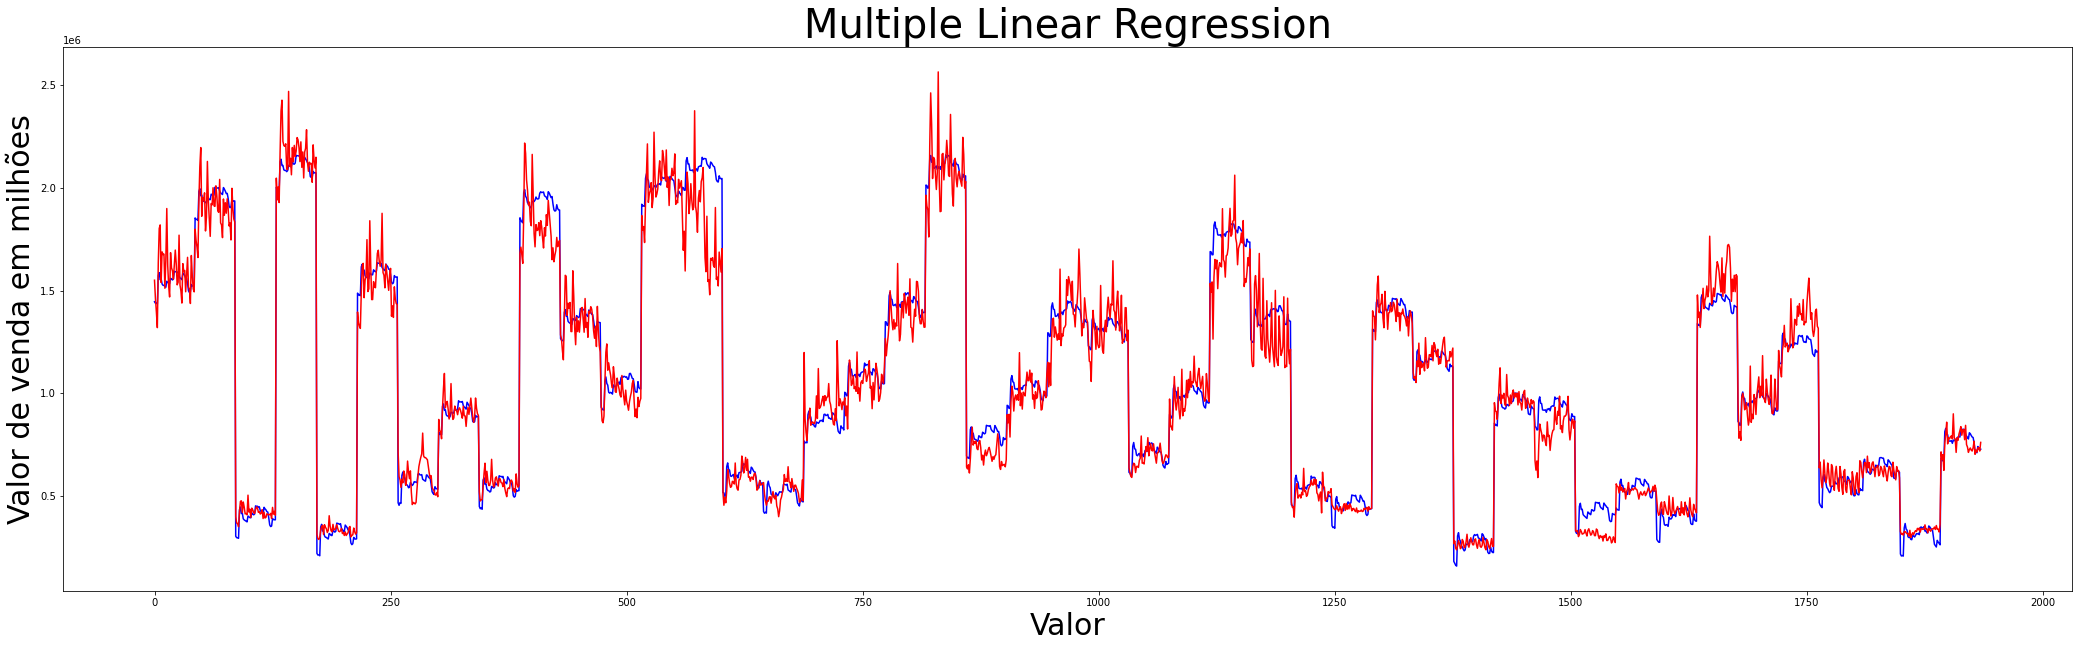

In [98]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(y_test, 'r')
plt.title("Multiple Linear Regression", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()

In [99]:
dt = DecisionTreeRegressor(random_state=0, min_samples_leaf=10, max_depth = 44)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(0.9500242862038608, 83486.31466907678, 119939.20986881803)

In [100]:
#for i, feature in enumerate(dt.feature_names_in_):
  #print("Feature {}: {}".format(feature, dt.feature_importances_[i]))


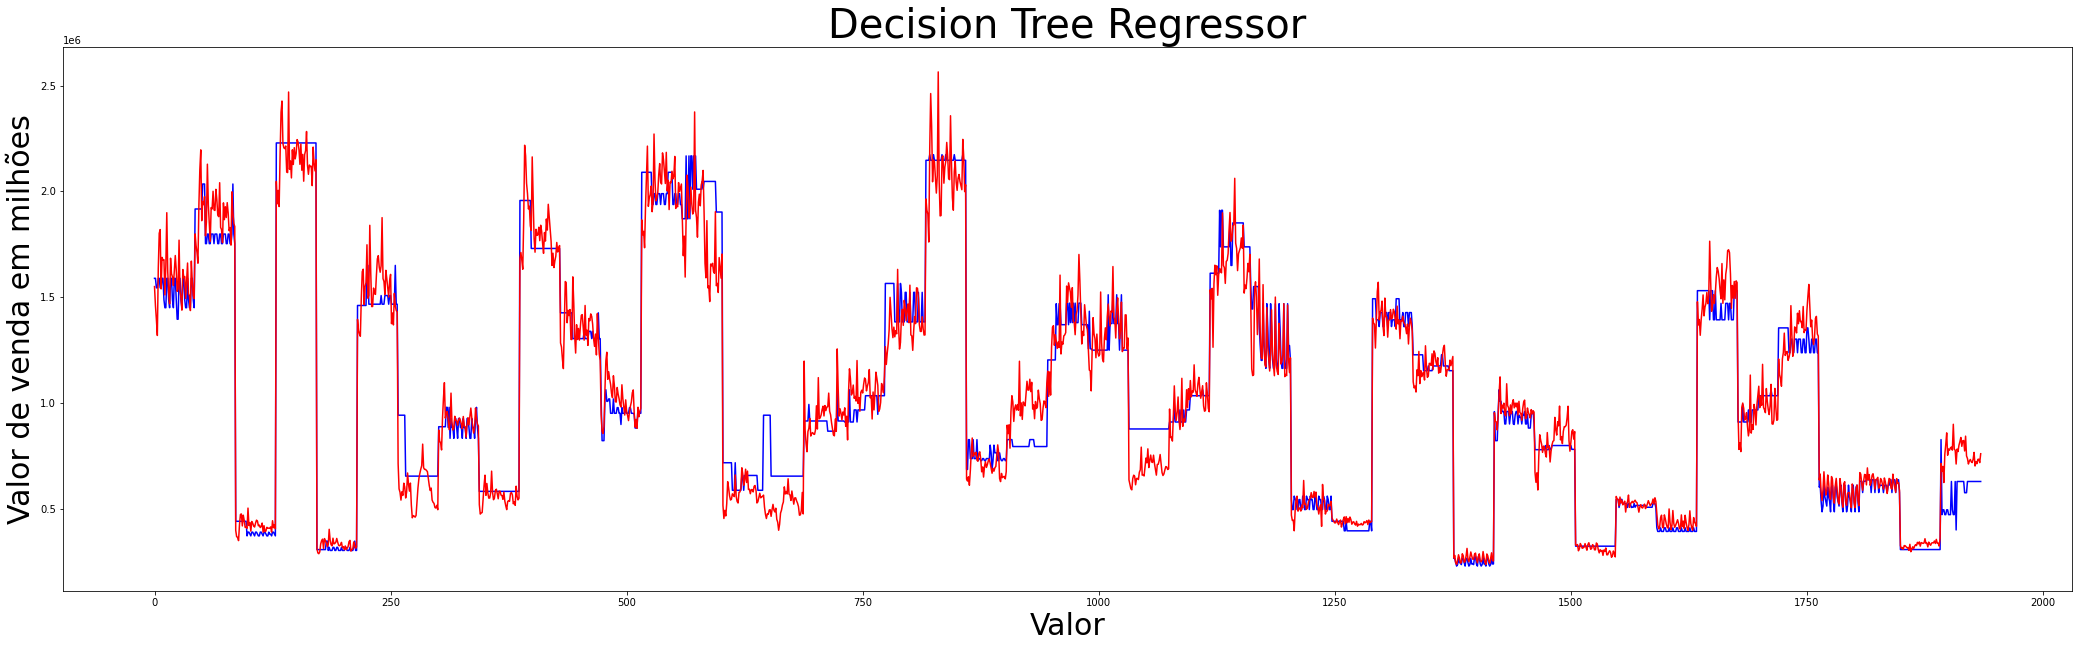

In [101]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(y_test, 'r')
plt.title("Decision Tree Regressor", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()

In [102]:
regr = RandomForestRegressor(random_state=0, min_samples_leaf=25)
regr.fit(X_train, y_train)
#dt = DecisionTreeRegressor(random_state=0, min_samples_leaf=10, max_depth = 44)

predictions = regr.predict(X_test)
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(0.9518994354825018, 86290.96966018481, 117667.56526047284)

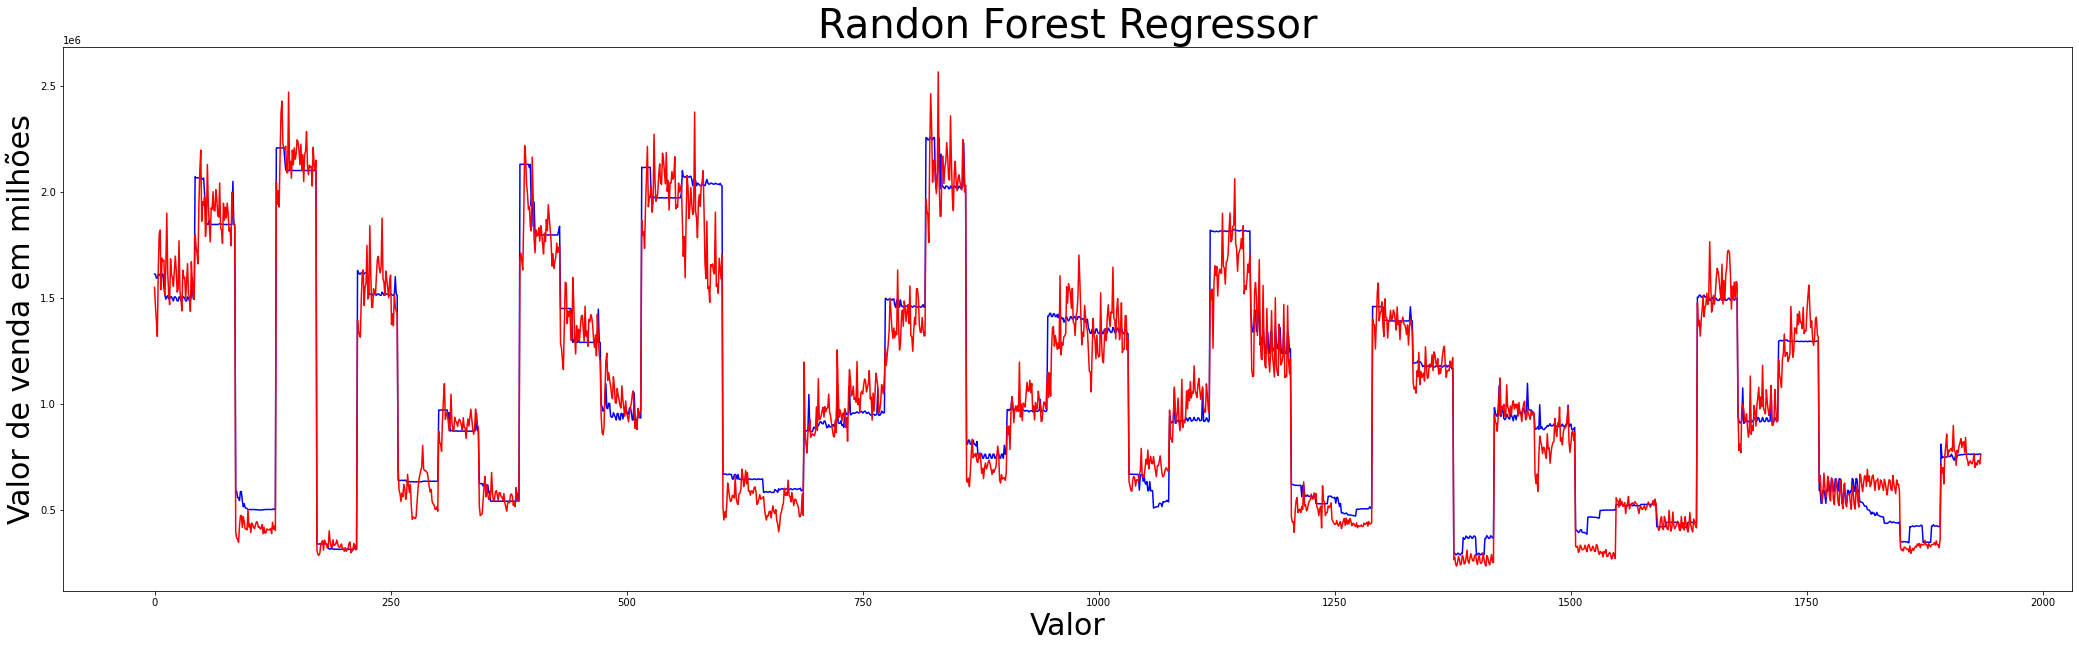

In [103]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(y_test, 'r')
plt.title("Randon Forest Regressor", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback


In [118]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
#X_train.info()

In [117]:
X_train_ = X_train.values;
X_test_ = X_test.values;
type(X_train_[0,0])

numpy.float32

In [107]:
def get_model(number_features):
    model = Sequential([
        Dense(10, input_shape = (number_features,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1) 
        
        
    ])
    
    model.compile(
         loss = 'mse',
         optimizer = 'adam'    
            )
    return model


In [119]:
es_cb = EarlyStopping(monitor='val_loss',patience=5)
model = get_model(63)
preds_on_untrained = model.predict(X_test_)
history = model.fit(
        X_train_,y_train,
        validation_data =(X_test_,y_test),
        epochs = 100,
        callbacks = [es_cb]
)

Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 1439277645824.0000 - val_loss: 1354991009792.0000
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 1433751126016.0000 - val_loss: 1341246144512.0000
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 1401171214336.0000 - val_loss: 1281425801216.0000
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 1302440574976.0000 - val_loss: 1134584659968.0000
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 1108616675328.0000 - val_loss: 891220721664.0000
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 838883803136.0000 - val_loss: 611631890432.0000
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 582556909568.0000 - val_loss: 412436365312.0000
Epoch 8/100
141/141 [==============================] - 0s 2ms/step - loss: 436361494528.0000 - val_loss: 342472458240.0000
Epoch 9

In [122]:
predictions = model.predict(X_test)

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(-0.1680592445538549, 480829.97, 579847.94)

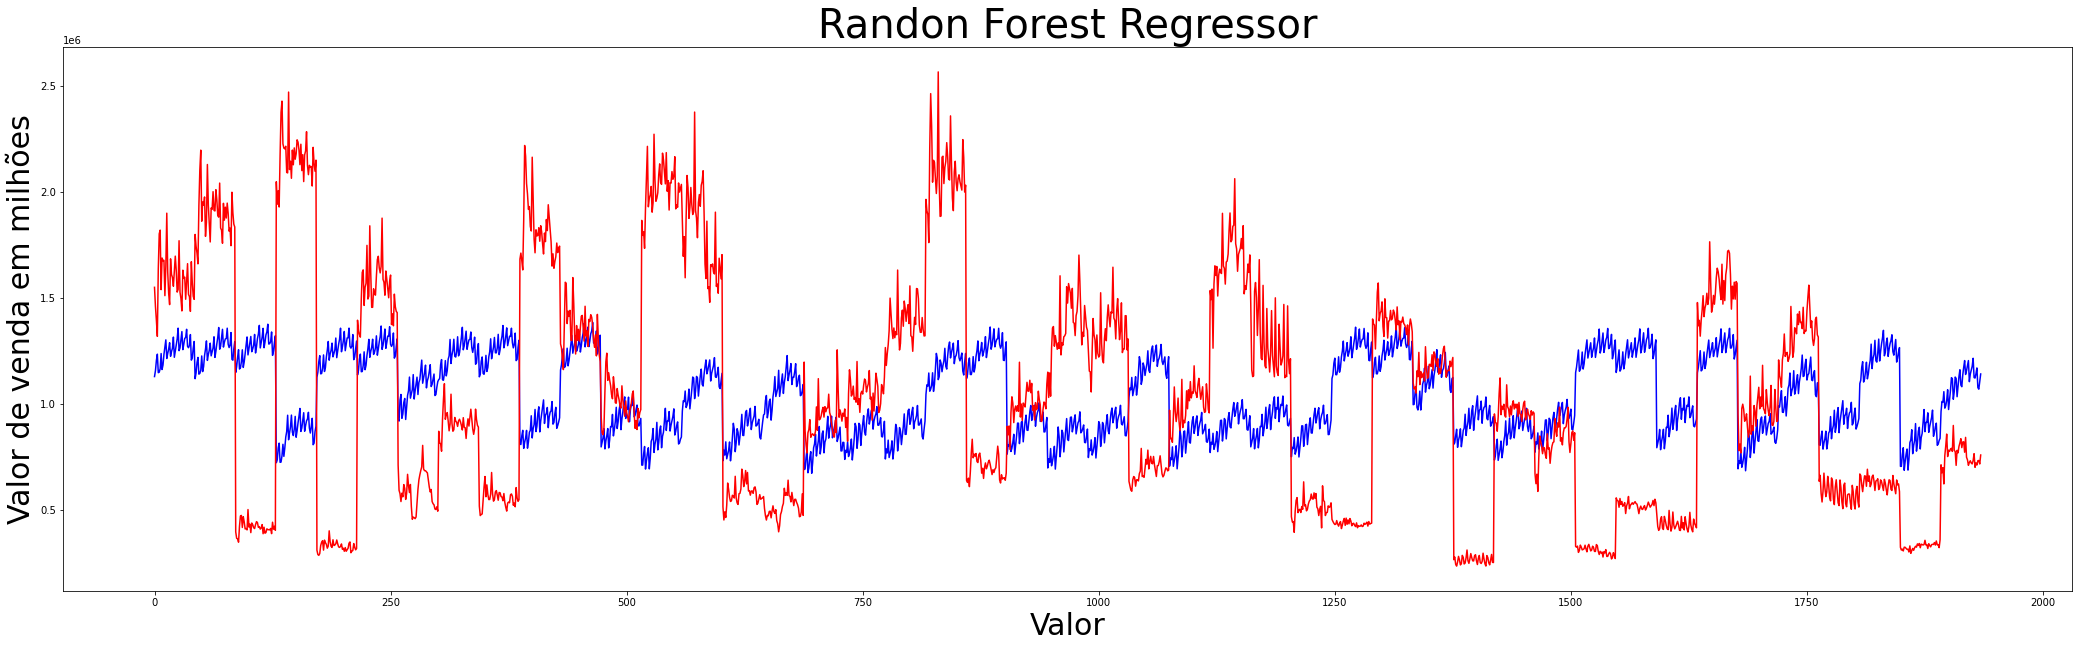

In [123]:
plt.figure(figsize = (36, 10)) 
plt.plot(predictions, 'b')
plt.plot(y_test, 'r')
plt.title("Randon Forest Regressor", fontsize=40)
plt.xlabel("Valor", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()